In [1]:
%load_ext itikz
import itikz
from itikz import nicematrix as nM
import jinja2

import numpy as np
import sympy as sym

import os
import tempfile
from pathlib import Path

from IPython.display import display
import logging
class JupyterHandler(logging.Handler):
    def _get_jupyter_level(self, level):
        level_name = logging.getLevelName(level)
        return level_name.lower()
        
    def emit(self, record):
        message = self.format(record)
        data = {
            'application/vnd.jupyterlab.log': {
                'type': 'text',
                'data': message,
                'level': self._get_jupyter_level(record.levelno)
            }
        }
        display(data, raw=True)

rootLogger = logging.getLogger()

rootLogger.setLevel(logging.INFO)
handler = JupyterHandler()
handler.setLevel(logging.INFO)
rootLogger.addHandler(handler)

#rootLogger.warning("HI")

In [2]:
np.random.seed(112244)
def gen_matrix(m,n):
    return np.random.randint( low=1,high=9, size=(m,n))

A0 = None;             A1 = gen_matrix(2,3); A2=gen_matrix(3,2);   A3=gen_matrix(2,1)
B0 = gen_matrix(2,2);  B1 = B0 @ A1;         B2= B1 @ A2;          B3=B2 @ A3
#C0 = gen_matrix(1,2);  C1 = C0 @ B1;         C2= C1 @ B2

#      -   (2,3) (3,2)   => COLS:  2 3 2
#    (2,2) (2,3) (2,2)   => ROWS:  3 2

layers=[ [A0, A1, A2, A3],
         [B0, B1, B2, B3],
       ]

In [3]:
# to generate absolute path names, our convention could be:
# 1) keep_file: augment with cwd():
#        keep_file = str(Path(os.path.join( os.getcwd(), keep_file )))
# 2) working_dir: augment with tempdir:
#        working_dir = str(Path( os.path.join( Path("/tmp" if platform.system() == "Darwin" else tempfile.gettempdir()), working_dir )))
import platform
tempdir = Path("/tmp" if platform.system() == "Darwin" else tempfile.gettempdir())

curdir  = os.getcwd()
print( "absolute path:", Path(curdir).is_absolute(),  curdir, type(curdir) )
print( ".             ", Path("/foo").is_absolute(),  Path("/foo"), type(Path("/foo")) )
print( ".             ", Path(os.path.join(tempdir,"/foo")).is_absolute(),  Path(os.path.join(tempdir,"/foo")) )

print(curdir)
print( "absolute path with cwd:", Path(os.path.join( os.getcwd(), "d:/ww/x" )) )
print( ".                      ", Path(os.path.join( os.getcwd(), "\\x" )) )
print( ".                      ", Path(os.path.join( os.getcwd(), "./foo" ) ))
print( "absolute path with tmp:", Path(os.path.join( tempdir, "d:/ww/x" ) ))
print( ".                      ", Path(os.path.join( tempdir, "\\x" )) )
print( ".                      ", Path(os.path.join( tempdir, "./foo" ) ))
from subprocess import run
#run(["dir", str(Path(os.path.join( tempdir, "." )))] )
curdir = Path(curdir)

absolute path: True /home/user/CODE/Langs/Python/ea42gh/ITIKZ/itikz <class 'str'>
.              True /foo <class 'pathlib.PosixPath'>
.              True /foo
/home/user/CODE/Langs/Python/ea42gh/ITIKZ/itikz
absolute path with cwd: /home/user/CODE/Langs/Python/ea42gh/ITIKZ/itikz/d:/ww/x
.                       /home/user/CODE/Langs/Python/ea42gh/ITIKZ/itikz/\x
.                       /home/user/CODE/Langs/Python/ea42gh/ITIKZ/itikz/foo
absolute path with tmp: /tmp/d:/ww/x
.                       /tmp/\x
.                       /tmp/foo


In [4]:
# Let's try some cases:
from pathlib import Path

#curdir  = Path(os.getcwd())
#tmp     = Path("foo");  print( tmp ); print( ". ", tmp.absolute())
#tmp     = Path("tmp");  print( tmp ); print( ". ", tmp.absolute())
#tmp     = Path("tmp/foo"); print( tmp.name ); print( ". ", tmp.absolute().parent)

def get_wd(s, root=None, add_itikz=True ):
    if root is None:
        tmp = os.environ.get( 'ITIKZ_TEMP_DIR' )
        if not tmp:
            import platform
            root = Path("/tmp" if platform.system() == "Darwin" else tempfile.gettempdir())
        else:
            root = Path(tmp)
    if s is None:
        if add_itikz:
            root = root / 'itikz'
        return root

    s      = Path(s)
    l      = len( s.parts )
    sa     = Path(s).absolute()

    if s.is_dir():
        d = sa / 'itikz' if add_itikz else sa
    if l > 1 and s.parent.is_dir():
        d = sa / 'itikz' if add_itikz else sa
    else:
        d =  root / s
        d = d / 'itikz' if add_itikz else d
    
    d.mkdir(parents=True, exist_ok=True)
    return d

def get_wf(s, root, sfx='tex'):
    s = Path(s)
    p = get_wd( s.parent, root, add_itikz=False )
    return p / ( s.name + '.' + sfx )

#foo=get_wd("tmp/fo", tempdir) #.parent # Path.cwd())
#get_wf( "tmp/itikz/b", curdir, 'tex')
get_wf("tmp/foo", tempdir ).name

'foo.tex'

In [5]:
def get_tmpdir( s ):
    tempdir = Path("/tmp" if platform.system() == "Darwin" else tempfile.gettempdir())

    if s is not None:
        s = get_wd( s, tempdir )
    else:
        s = os.environ.get( 'ITIKZ_TEMP_DIR' )
        if not s:
            s = tempdir / 'itikz'
    #s.mkdir(parents=True, exist_ok=True)
    return s
get_tmpdir( "/tmp" )

PosixPath('/tmp/itikz')

| | | | |
| --- | --- | --- | --- |
|     |       | y y |   |
|     | x x x | y y |z |
|     | x x x | y y |z |
| a a | * * * | * * |# |
| a a | * * * | * * |# |

# MatrixGridLayout

In [5]:
#%load itikz/nicematrix.py

In [6]:
def testMatrixGridLayout():
    mm = nM.MatrixGridLayout(layers, extra_cols=[1,0,0,0,3], extra_rows=[0,0,0])
    mm.describe()
    print()
    #print( 'no partition:', MatrixGridLayout.matrix_array_format( 5 ))
    #print( 'partition:   ', MatrixGridLayout.matrix_array_format( 5, vpartitions=[1,3,4] ))
    #print()
    print('Top Left : Bottom Right Corners')
    for i in range(mm.nGridRows):
        for j in range(mm.nGridCols):
            tl,br,_ = mm._top_left_bottom_right(i,j)
            print( f"  {tl}:{br}", end='')
        print()
    # ====================================================================
    # Process the Matrix Grid for Display
    # ====================================================================
    mm.array_format_string_list( partitions={ 1:[2], 2:[1]} )
    mm.array_of_tex_entries()
    mm.nm_submatrix_locs()
    
    red   = nM.make_decorator( text_color='red' )    
    boxbf = nM.make_decorator( boxed=True, bf=True)
    bg    = nM.make_decorator( text_bg="red!15")

    mm.decorate_tex_entries( 0,3, red,   entries=None )
    mm.decorate_tex_entries( 1,2, boxbf, entries= [(1,0),(0,1)])
    mm.decorate_tex_entries( 1,1, bg,    entries=[(0,0),(1,1)] )

    #mm.decorate_tex_entries( 1,2, lambda a: '\\boxed{{ {a} }}'.format(a=a), entries= [(1,0),(0,1)])

    mm.tex_repr( blockseps = r'\noalign{\vskip2mm} ')

    # ====================================================================

    print("% -------------------------------------")
    print(f"format: {mm.format}");
    print("% -------------------------------------")
    print("LaTeX representation of the matrix")
    for l in mm.tex_list:
        print(l)
    print("% -------------------------------------")
    print("Submatrices:", mm.locs )
    print("% -------------------------------------")

    return mm

# Example mX: Single Matrix, Extra Rows

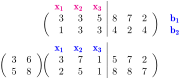

In [7]:
mX = nM.MatrixGridLayout([[None, gen_matrix(2,6)],[gen_matrix(2,2), gen_matrix(2,6)]], extra_cols=1, extra_rows=[1,1,0])
mX.array_format_string_list( partitions={ 1:[3]} )
mX.array_of_tex_entries()

mX.add_row_above(0,1,['x_1','x_2','x_3'], formater = lambda a: '\\color{{magenta}}{{\\mathbf{{ {a} }}}}'.format(a=a))
mX.add_row_below(0,1,['x_1','x_2','x_3'], formater = lambda a: '\\color{{blue}}{{\\mathbf{{ {a} }}}}'.format(a=a))

mX.add_col_right(0,1,['b_1','b_2'], formater = lambda a: '\\color{{blue}}{{\\mathbf{{ {a} }}}}'.format(a=a))

mX.nm_submatrix_locs()


mX.tex_repr( blockseps = r'\noalign{\vskip2mm} ')
mX_code = mX.nm_latexdoc()

h = itikz.fetch_or_compile_svg(
        mX_code, prefix='tst_', working_dir="tmp", debug=False,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        nexec=4, keep_file="tmp/foo" )
h

# Example m1

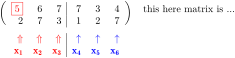

In [8]:
m1 = nM.MatrixGridLayout(gen_matrix(2,6), extra_cols=1, extra_rows=2)
m1.array_format_string_list( partitions={ 1:[3]} )
m1.array_of_tex_entries()
m1.decorate_tex_entries( 0,1, lambda a: '\\color{{red}}{{ \\boxed{{{a}}} }}'.format(a=a), entries=[(0,0)] )

blue = nM.make_decorator(text_color='blue', bf=True)
red  = nM.make_decorator(text_color='red',  bf=True)

typ = [red(r'\Uparrow'),red(r'\Uparrow'),red(r'\Uparrow'),blue(r'\uparrow'),blue(r'\uparrow'),blue(r'\uparrow')]
var = [red('x_1'),      red('x_2'),      red('x_3'),      blue('x_4'),      blue('x_5'),      blue('x_6')]

m1.add_row_below(0,1,typ, formater=lambda a: a )
m1.add_row_below(0,1,var, offset=1, formater=lambda a: a )

m1.nm_text( ['this here matrix is ...'])
m1.nm_submatrix_locs()
m1.tex_repr( blockseps = r'\noalign{\vskip2mm} ')

m1_code = m1.nm_latexdoc()

working_dir = os.path.join( os.getcwd(), "tmp" )
keep_file   = os.path.join( working_dir, "m1" )
h = itikz.fetch_or_compile_svg(
        m1_code, prefix='m1_', working_dir=working_dir, debug=False,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        nexec=4, keep_file=keep_file )
h

# Example m2

In [9]:
m2=testMatrixGridLayout()

Layout 2 x 4 grid:
.  first grid row has max rows = 3 <= COLS: [2, 3, 2, 1]
.  first grid col has max cols = 2 <= ROWS: [3, 2]
.  insert extra_cols:            [1, 0, 0, 0, 3]
.  col_start                   = [ 1  3  6  8 12]
.  row_start                   = [0 3 5]

Consistent Matrix Sizes in the grid
  (3, 2)  (3, 3)  (3, 2)  (3, 1)
  (2, 2)  (2, 3)  (2, 2)  (2, 1)
Actual TopLeft:BottomRight Indices
  (3, 3):(2, 2)  (1, 3):(2, 5)  (0, 6):(2, 7)  (1, 8):(2, 8)
  (3, 1):(4, 2)  (3, 3):(4, 5)  (3, 6):(4, 7)  (3, 8):(4, 8)

Top Left : Bottom Right Corners
  (3, 3):(2, 2)  (1, 3):(2, 5)  (0, 6):(2, 7)  (1, 8):(2, 8)
  (3, 1):(4, 2)  (3, 3):(4, 5)  (3, 6):(4, 7)  (3, 8):(4, 8)
% -------------------------------------
format: r@{\qquad\ }*2r@{\qquad\ }*2rI*1r@{\qquad\ }*1rI*1r@{\qquad\ }*1r@{\qquad\ }rrl@{\qquad\;\;}
% -------------------------------------
LaTeX representation of the matrix
 &  &  &  &  &  & 1 & 2 &  &  &  &  \\
 &  &  & 7 & 5 & 6 & 4 & 3 & \color{red}{3} &  &  &  \\
 &  &  

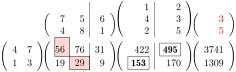

In [10]:
m2_latex_doc = m2.nm_latexdoc(template = nM.GE_TEMPLATE, preamble = nM.preamble, extension = nM.extension )

working_dir = os.path.join( os.getcwd(), "tmp" )
keep_file   = os.path.join( working_dir, "m2" )
h = itikz.fetch_or_compile_svg(
        m2_latex_doc, prefix='m2_', working_dir=working_dir, debug=False,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        nexec=4, keep_file=keep_file )
h

# Example m3

In [11]:
k  = sym.Symbol('k'); h = sym.Symbol('h')
Ab = sym.Matrix([[1,2,4,1],[2,k,8,h],[3,7,3,1]]); matrices = [[None, Ab]]; pivots = []; txt=[]
# we could use row ops, but we want a computational layout (and hence the E matrices!):
#    A=A.elementary_row_op('n->n+km', k=-3, row1=2,row2=0 );A
#    A=A.elementary_row_op('n<->m',row1=1,row2=2);A

E1=sym.eye(3);E1[1:,0]=[-2,-3]; A1=E1*Ab;                               matrices.append([E1,A1]); pivots.append((1,1));txt.append('Pivot at (1,1)')
E2=sym.eye(3);E2=E2.elementary_row_op('n<->m',row1=1,row2=2); A2=E2*A1; matrices.append([E2,A2]); pivots.append(None); txt.append('Rows 2 <-> 3')
E3=sym.eye(3);E3[2,1]=4-k; A3=E3*A2;                                    matrices.append([E3,A3]); pivots.append((2,2));txt.append('Pivot at (2,2)')
pivots.append((3,3)); txt.append('In Row Echelon Form')

if False:
    mat_rep, submatrix_locs, pivot_locs, path_corners, txt_with_locs,mat_format = \
       nM.ge_layout( matrices, Nrhs=1, pivots=pivots, txt=txt, decorate=True,\
                     formater=lambda x: sym.latex(x))

    mat_options = r"""[ code-before =
        {
        % ----------------------------------------------------------------------- Row-echelon form Path
        \tikz \draw[red] """ + " -- ".join( path_corners )+ " ; } ]"

    h =\
    itikz.fetch_or_compile_svg( jinja2.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                          mat_rep=mat_rep, mat_format=mat_format, mat_options=mat_options,
                                                                          submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                                prefix='sol_rhs_', working_dir='/tmp/itikz', debug=False,
                                **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True), nexec=4, keep_file="/tmp/foo" )
    display(h)

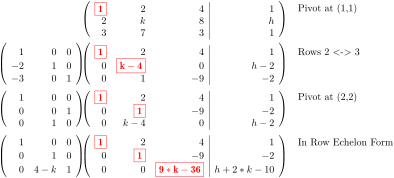

In [12]:
m3 = nM.MatrixGridLayout(matrices, extra_cols=1)
m3.array_format_string_list( partitions={ 1:[3]} )
m3.array_of_tex_entries()
red_box = nM.make_decorator( text_color='red', boxed=True, bf=True )
m3.decorate_tex_entries( 0,1, red_box, entries=[(0,0)] )
m3.decorate_tex_entries( 1,1, red_box, entries=[(0,0),(1,1)] )
m3.decorate_tex_entries( 2,1, red_box, entries=[(0,0),(1,1)] )
m3.decorate_tex_entries( 3,1, red_box, entries=[(0,0),(1,1),(2,2)] )

m3.nm_text(txt)

m3.nm_submatrix_locs()
m3.tex_repr( blockseps = r'\noalign{\vskip2mm}')

m3_code = m3.nm_latexdoc(template = nM.GE_TEMPLATE, preamble = nM.preamble, extension = nM.extension )

working_dir = os.path.join( os.getcwd(), "tmp" )
keep_file   = os.path.join( working_dir, "m3" )
h = itikz.fetch_or_compile_svg(
        m3_code, prefix='m3_', working_dir=working_dir, debug=False,
        **itikz.build_commands_dict(use_xetex=True,use_dvi=False,crop=True),
        nexec=4, keep_file=keep_file )
h